In [ ]:
pip show mysql-connector-python


Name: mysql-connector-python
Version: 9.5.0
Summary: A self-contained Python driver for communicating with MySQL servers, using an API that is compliant with the Python Database API Specification v2.0 (PEP 249).
Home-page: https://dev.mysql.com/doc/connector-python/en/
Author: Oracle and/or its affiliates
Author-email: 
License: GNU GPLv2 (with FOSS License Exception)
Location: /usr/local/lib/python3.12/dist-packages
Requires: 
Required-by: 


In [82]:
import mysql.connector


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sales'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Tripathi12@',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = r'C:\Users\satyam tripathi\Downloads\orders\New python code\Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [108]:
db = mysql.connector.connect( host='127.0.0.1',
                                user='root',
                                password='Tripathi12@',
                                database='ecommerce')
cur = db.cursor()


# List all unique cities where customers are located.



In [109]:
query = """select distinct(customer_city) from customers"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


In [110]:
## count the number of orders placed in 2017.
query = """select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data = cur.fetchall()
"total orders placed in 2017 are", data[0]

('total orders placed in 2017 are', (90202,))

In [111]:
## Find the total sales per category.
query = """select products.product_category category, round(sum(payments.payment_value),2)sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,perfumery,4053909.28
1,Furniture Decoration,11441411.13
2,telephony,3895056.41
3,bed table bath,13700429.37
4,automotive,6818354.65
...,...,...
69,cds music dvds,9595.44
70,La Cuisine,23308.24
71,Fashion Children's Clothing,6285.36
72,PC Gamer,17395.44


In [112]:
## Calculate the percentage of orders that were paid in installments.
query = """select (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*) *100 from payments
"""
cur.execute(query)

data = cur.fetchall()
data
"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

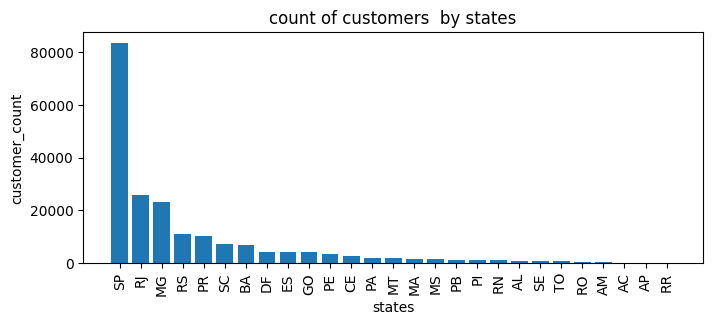

In [100]:
## count the number of customers from each state.
query = """select customer_state,count(customer_id)
from customers group by customer_state
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)
plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("count of customers  by states")

plt.show()

In [113]:
## count the number of customers from each state.
query = """select customer_state,count(customer_id)
from customers group by customer_state
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df

,state,customer_count
0,SP,83492
1,SC,7274
2,MG,23270
3,PR,10090
4,RJ,25704
5,RS,10932
6,PA,1950
7,GO,4040
8,ES,4066
9,BA,6760


## Advanced queries

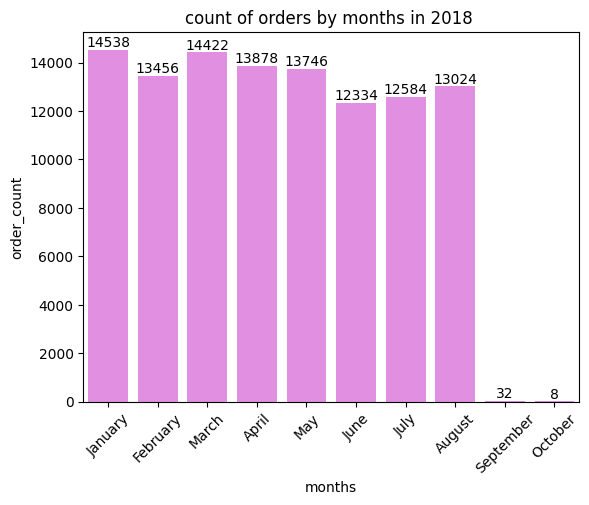

In [114]:
# Calculate the number of orders per month in 2018.
query = """select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
ax = sns.barplot(x = df["months"],y = df["order_count"], data = df, order = o, color = "violet")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("count of orders by months in 2018 ")
plt.show()

In [115]:
## find the average number of products per order, grouped by customer city.
query = """with count_per_order as (
select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) as avg_products_per_order 
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by avg_products_per_order desc
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer city", "avg products per order"])
df.head(10)

,customer city,avg products per order
0,padre carvalho,28.00
1,celso ramos,26.00
2,datas,24.00
3,candido godoi,24.00
4,matias olimpio,20.00
5,cidelandia,16.00
6,curralinho,16.00
7,picarra,16.00
8,morro de sao paulo,16.00
9,teixeira soares,16.00


In [116]:
# calculate the percentage of total revenue contributed by each product category.
query = """select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.order_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc

"""
cur.execute(query)
df = pd.DataFrame(data, columns = ["Category", "Percentage distribution"])
df


,Category,Percentage distribution
0,padre carvalho,28.00
1,celso ramos,26.00
2,datas,24.00
3,candido godoi,24.00
4,matias olimpio,20.00
...,...,...
4105,sao mamede,4.00
4106,sambaiba,4.00
4107,japaratuba,4.00
4108,tuiuti,4.00


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "Tripathi12@",
                             database = "ecommerce")

cur = db.cursor()

In [124]:
## Identify the correlation between product and the number of times a product has been purchased.
query = """
select products.product_category,
count(order_items.product_id),
round(avg(order_items.price))
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "order_count", "price"])
arr1 = df["order_count"]
arr2 = df["price"]
np.corrcoef([arr1,arr2])

array([[ 1.       , -0.1064395],
       [-0.1064395,  1.       ]])